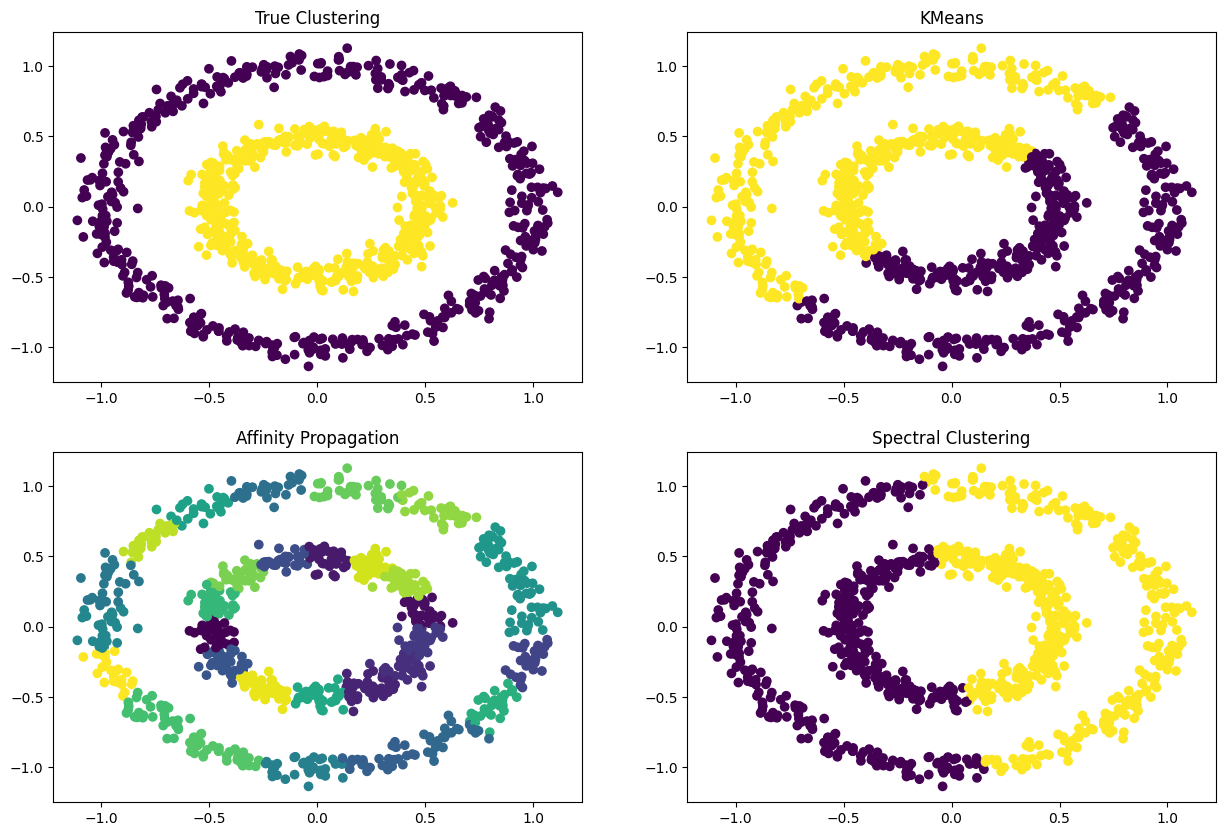

In [28]:
#Task 3.1: Generate two artificial two dimensional data sets with at least 10 different intrinsic clusters (e.g.checkerboard structure).
# Transform the data into a format such that kmeans++, affinity propagation, and spectral clustering, respectively, can deal with the data and describe, 
# which transformation you use and why (Note that some me- thods do this implicitly in scikit-learn functions. Please check this!) 
# Produce clu- stering results for each of the algorithms using the intrinsic number of clusters and inspect the result visually.
# Also provide a numeric evaluation. Which method works best and why?

from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# First dataset X1:
# Generate concentric circles dataset
X1, y1 = make_circles(n_samples=1000, factor=0.5, noise=0.05)
# Scale the data
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
# Compute the RBF kernel (for affinity propagation and spectral clustering)
X1_rbf = rbf_kernel(X1_scaled, gamma=1)

# Second dataset X2:
# Generate checkerboard dataset
X2, y2 = make_blobs(n_samples=1000, centers=10, cluster_std=0.5, random_state=0)
# Scale the data
X2_scaled = scaler.fit_transform(X2)
# Compute the RBF kernel
X2_rbf = rbf_kernel(X2_scaled, gamma=1)

# Define the number of clusters for each dataset
n_clusters1 = 2
n_clusters2 = 10

# Perform clustering using KMeans
kmeans1 = KMeans(n_clusters=n_clusters1, random_state=0).fit(X1_scaled)
kmeans2 = KMeans(n_clusters=n_clusters2, random_state=0).fit(X2_scaled)

# Perform clustering using AffinityPropagation
affinity_propagation1 = AffinityPropagation(damping=0.9).fit(X1_rbf)
affinity_propagation2 = AffinityPropagation(damping=0.9).fit(X2_rbf)

# Perform clustering using SpectralClustering
spectral_clustering1 = SpectralClustering(n_clusters=n_clusters1, affinity='rbf', gamma=1).fit(X1_scaled)
spectral_clustering2 = SpectralClustering(n_clusters=n_clusters2, affinity='rbf', gamma=1).fit(X2_scaled)

# Visualize the clustering results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Dataset X1
axs[0, 0].scatter(X1[:, 0], X1[:, 1], c=y1)
axs[0, 0].set_title('True Clustering')
axs[0, 1].scatter(X1[:, 0], X1[:, 1], c=kmeans1.labels_)
axs[0, 1].set_title('KMeans')
axs[1, 0].scatter(X1[:, 0], X1[:, 1], c=affinity_propagation1.labels_)
axs[1, 0].set_title('Affinity Propagation')
axs[1, 1].scatter(X1[:, 0], X1[:, 1], c=spectral_clustering1.labels_)
axs[1, 1].set_title('Spectral Clustering')

plt.show()


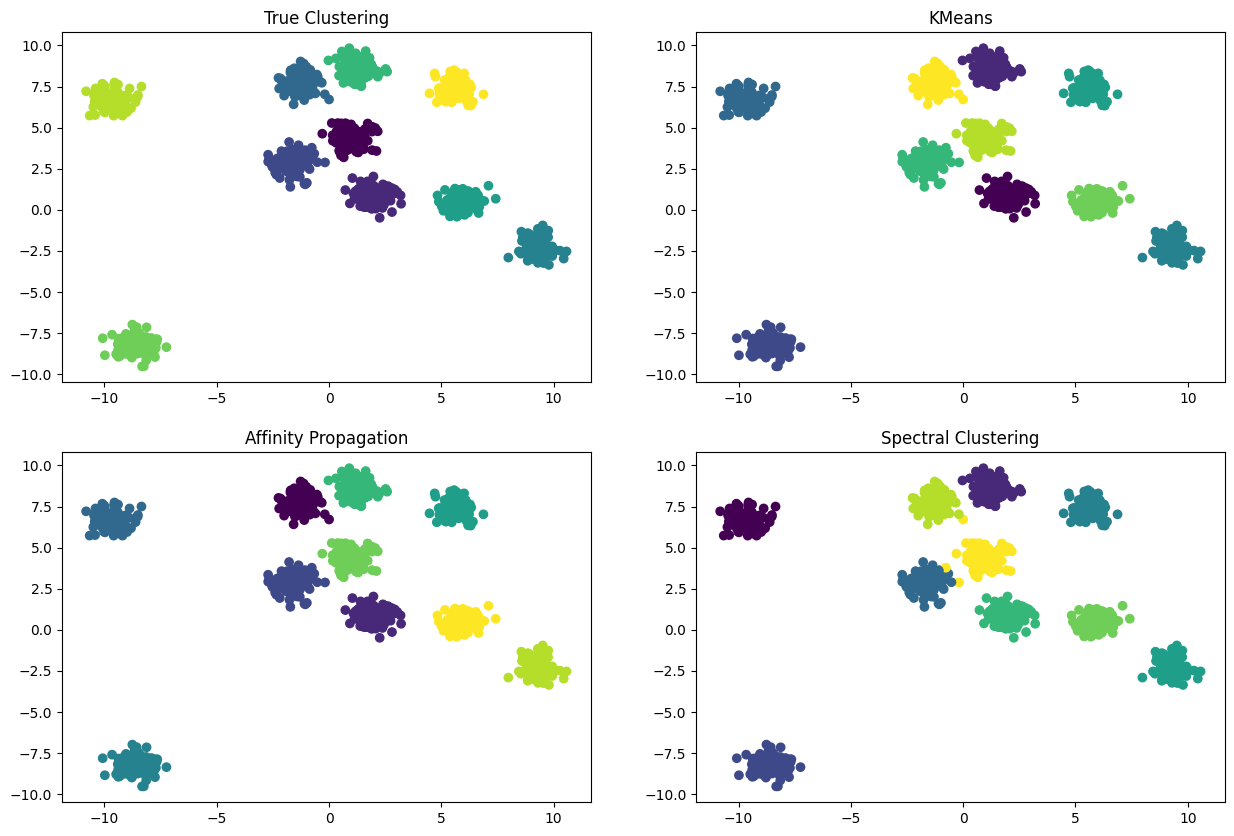

In [29]:
# Dataset 2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].scatter(X2[:, 0], X2[:, 1], c=y2)
axs[0, 0].set_title('True Clustering')
axs[0, 1].scatter(X2[:, 0], X2[:, 1], c=kmeans2.labels_)
axs[0, 1].set_title('KMeans')
axs[1, 0].scatter(X2[:, 0], X2[:, 1], c=affinity_propagation2.labels_)
axs[1, 0].set_title('Affinity Propagation')
axs[1, 1].scatter(X2[:, 0], X2[:, 1], c=spectral_clustering2.labels_)
axs[1, 1].set_title('Spectral Clustering')

plt.show()

In [30]:
# numeric evaluation of the clustering results:
# 1. Compute the silhouette score
# 2. compute the adjusted rand index (ARI)

silhouette_scores = {
    'KMeans1': silhouette_score(X1_scaled, kmeans1.labels_),
    'KMeans2': silhouette_score(X2_scaled, kmeans2.labels_),
    'AffinityPropagation1': silhouette_score(X1_rbf, affinity_propagation1.labels_),
    'AffinityPropagation2': silhouette_score(X2_rbf, affinity_propagation2.labels_),
    'SpectralClustering1': silhouette_score(X1_scaled, spectral_clustering1.labels_),
    'SpectralClustering2': silhouette_score(X2_scaled, spectral_clustering2.labels_)
}

# Compute the ARI for each algorithm on each dataset
ari_scores = {
    'KMeans1': adjusted_rand_score(y1, kmeans1.labels_),
    'KMeans2': adjusted_rand_score(y2, kmeans2.labels_),
    'AffinityPropagation1': adjusted_rand_score(y1, affinity_propagation1.labels_),
    'AffinityPropagation2': adjusted_rand_score(y2, affinity_propagation2.labels_),
    'SpectralClustering1': adjusted_rand_score(y1, spectral_clustering1.labels_),
    'SpectralClustering2': adjusted_rand_score(y2, spectral_clustering2.labels_)
}

# Print the silhouette scores and ARI for each algorithm
print('Silhouette Scores:')
for algorithm, score in silhouette_scores.items():
    print(f'{algorithm}: {score:.3f}')
    
print('\nARI Scores:')
for algorithm, score in ari_scores.items():
    print(f'{algorithm}: {score:.3f}')

Silhouette Scores:
KMeans1: 0.352
KMeans2: 0.765
AffinityPropagation1: 0.459
AffinityPropagation2: 0.773
SpectralClustering1: 0.355
SpectralClustering2: 0.763

ARI Scores:
KMeans1: -0.001
KMeans2: 1.000
AffinityPropagation1: 0.064
AffinityPropagation2: 1.000
SpectralClustering1: -0.001
SpectralClustering2: 0.993


In [ ]:
# According to both evaluation methods, one can see that the kMeans++ algorithm works best on both datasets
# beacuse it holds the highest silhoutte and ARI scores.